In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import requests
import json
import datetime as dt

state_lockdown_file = pd.read_csv("data_sources/lockdown_us.csv")
state_deaths_cases_file = pd.read_csv("data_sources/liz-friedman-us-covid-19-data-from-nytimes/us-states.csv")
county_population_file = pd.read_csv("data_sources/qventus-covid-19-localized-scenario-planner/qventus-covid-19-localized-scenario-planner/covid_county_population_usafacts.csv")


In [3]:
url = "https://api.covidtracking.com/v1/states/current.json"
state_current_data = (requests.get(url)).json()
state_current_data=pd.DataFrame(state_current_data)
state_current_data


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200826,AK,5719,329085,NaN,44.0,NaN,NaN,NaN,6.0,...,334804,1,0,d9f7e0826fb6675334cd2621a69a85060d3df87d,0,0,0,0,0,
1,20200826,AL,119254,824431,NaN,1077.0,14005.0,NaN,1412.0,NaN,...,943685,8,212,d3485886905948f2a1ee44e033157877576c0571,0,0,0,0,0,
2,20200826,AR,58023,625250,NaN,435.0,4061.0,NaN,NaN,108.0,...,683273,21,48,7baca8490439947b97cb5779289239e087ab37f4,0,0,0,0,0,
3,20200826,AS,0,1514,NaN,NaN,NaN,NaN,NaN,NaN,...,1514,0,0,d6804c7b3b61d39816426beba31ff5ca4758b98c,0,0,0,0,0,
4,20200826,AZ,199459,967451,NaN,967.0,21376.0,305.0,NaN,180.0,...,1166910,104,11,836897c2325e26019a8947a3eb09ac383976e40e,0,0,0,0,0,
5,20200826,CA,679099,10153658,NaN,5537.0,NaN,1507.0,NaN,NaN,...,10832757,150,0,b1a45690a75bf9770c550a9cb7ad0d7d74857d0b,0,0,0,0,0,
6,20200826,CO,55800,626261,NaN,243.0,6894.0,NaN,NaN,NaN,...,682061,2,49,92333b3dc4d7760cb69fc2ca57ece3a1b3a20906,0,0,0,0,0,
7,20200826,CT,52220,1045815,NaN,57.0,11087.0,NaN,NaN,NaN,...,1098035,0,0,65dbf98e34551ab59fc46decfa489e6ce5af81e1,0,0,0,0,0,
8,20200826,DC,13722,260026,NaN,77.0,NaN,25.0,NaN,13.0,...,273748,1,0,bb55cb1b09c6f78be2381456a423cbea120588b1,0,0,0,0,0,
9,20200826,DE,16986,210109,NaN,50.0,NaN,13.0,NaN,NaN,...,227095,1,0,d7da61fc33bc986e7f9f50bd6433ed5ac9115a12,0,0,0,0,0,


In [4]:
url = "https://api.covidtracking.com/v1/states/daily.json"
state_daily_data = (requests.get(url)).json()
state_daily_data=pd.DataFrame(state_daily_data)

#loop for summing for total state cases
states = state_daily_data["state"].unique()
total_cases_by_state = []


for state in states:
    state_case = state_daily_data.loc[state_daily_data["state"] == state]
    total_cases_by_state.append(state_case["positive"].sum())



In [5]:
#States total population
state_pop = []
states = county_population_file["State"].unique()

for state in states:
    state_df = county_population_file.loc[county_population_file["State"] == state]
    state_pop.append(state_df["population"].sum())
    
population_df = pd.DataFrame({
    "state": states,
    "population": state_pop
})

In [6]:
state_deaths_cases_file.head()
state_deaths_cases_file = state_deaths_cases_file.rename(columns={"state":"State"})
state_deaths_cases_file = state_deaths_cases_file.sort_values("State")

state_deaths_cases_file['month'] = pd.DatetimeIndex(state_deaths_cases_file['date']).month
state_deaths_cases_file['day'] = pd.DatetimeIndex(state_deaths_cases_file['date']).day

state_deaths_cases_file

,date,State,fips,cases,deaths,month,day
2874,2020-04-24,Alabama,1,6026,209,4,24
7549,2020-07-18,Alabama,1,65234,1286,7,18
3589,2020-05-07,Alabama,1,9046,369,5,7
3699,2020-05-09,Alabama,1,9668,390,5,9
9254,2020-08-18,Alabama,1,110361,1936,8,18
...,...,...,...,...,...,...,...
1443,2020-03-28,Wyoming,56,85,0,3,28
5293,2020-06-06,Wyoming,56,939,17,6,6
5348,2020-06-07,Wyoming,56,947,17,6,7
1608,2020-03-31,Wyoming,56,121,0,3,31


In [7]:
state_deaths_cases_file = state_deaths_cases_file.dropna()
state_deaths_cases_file = state_deaths_cases_file.set_index("State")
state_deaths_cases_file




,date,fips,cases,deaths,month,day
State,,,,,,
Alabama,2020-04-24,1,6026,209,4,24
Alabama,2020-07-18,1,65234,1286,7,18
Alabama,2020-05-07,1,9046,369,5,7
Alabama,2020-05-09,1,9668,390,5,9
Alabama,2020-08-18,1,110361,1936,8,18
...,...,...,...,...,...,...
Wyoming,2020-03-28,56,85,0,3,28
Wyoming,2020-06-06,56,939,17,6,6
Wyoming,2020-06-07,56,947,17,6,7


In [8]:
state_deaths_cases_file = state_deaths_cases_file.loc[["Arizona","Florida","Kansas",
                                                       "New York","Washington","Wisconsin"],["date","deaths"]]


In [9]:
ks_data = state_deaths_cases_file.loc[["Kansas"],["date","deaths"]]
ks_data.sort_values("deaths")

,date,deaths
State,,
Kansas,2020-03-10,0
Kansas,2020-03-09,0
Kansas,2020-03-08,0
Kansas,2020-03-11,0
Kansas,2020-03-07,0
...,...,...
Kansas,2020-08-19,420
Kansas,2020-08-20,423
Kansas,2020-08-21,430


In [10]:
state_lockdown_file[pd.isnull(state_lockdown_file['County'])]
state_lockdown_file[pd.isnull(state_lockdown_file['Type'])]

state_lockdown_file['month'] = pd.DatetimeIndex(state_lockdown_file['Date']).month
state_lockdown_file['day'] = pd.DatetimeIndex(state_lockdown_file['Date']).day

state_lockdown_file

,Country,State,County,Date,Type,month,day
0,United States,Alabama,NaN,2020-04-04,Stay at home,4,4
1,United States,Alabama,Birmingham,2020-03-24,Shelter in place,3,24
2,United States,Alaska,NaN,2020-03-28,Stay at home,3,28
3,United States,Arizona,NaN,2020-03-31,Stay at home,3,31
4,United States,California,NaN,2020-03-19,Stay at home,3,19
...,...,...,...,...,...,...,...
168,United States,Virginia,NaN,2020-03-30,Stay at home,3,30
169,United States,Washington,NaN,2020-03-23,Stay at home,3,23
170,United States,West Virginia,NaN,2020-03-24,Stay at home,3,24
171,United States,Wisconsin,NaN,2020-03-25,Stay at home,3,25


In [11]:
state_current_narrow = state_current_data[["state","positive","death","hospitalized"]]
state_current_drop = state_current_narrow.dropna()
state_current_drop
state_current_drop = state_current_drop.set_index('state')
state_current_drop

state_current_df = pd.merge(state_current_drop, population_df, on='state')
state_current_df

,state,positive,death,hospitalized,population
0,AL,119254,2045,14005.0,4903185
1,AR,58023,732,4061.0,3017804
2,AZ,199459,4896,21376.0,7278717
3,CO,55800,1826,6894.0,5758736
4,CT,52220,4463,11087.0,3565287
5,FL,608722,10872,37847.0,21477737
6,GA,260590,5311,23939.0,10617423
7,HI,6984,49,419.0,1415872
8,ID,30475,326,1285.0,1787065
9,IN,89359,3259,10605.0,6732219


In [12]:
special_states_data = state_current_drop.loc[["AZ","FL","KS","NY","WA","WI"],["death","hospitalized"]]
special_states_data


,death,hospitalized
state,,
AZ,4896,21376.0
FL,10872,37847.0
KS,437,2226.0
NY,25305,89995.0
WA,1876,6595.0
WI,1108,5651.0


Text(0.5, 1.0, 'Comparing States by Deaths and Hospitalizations Due to COVID-19')

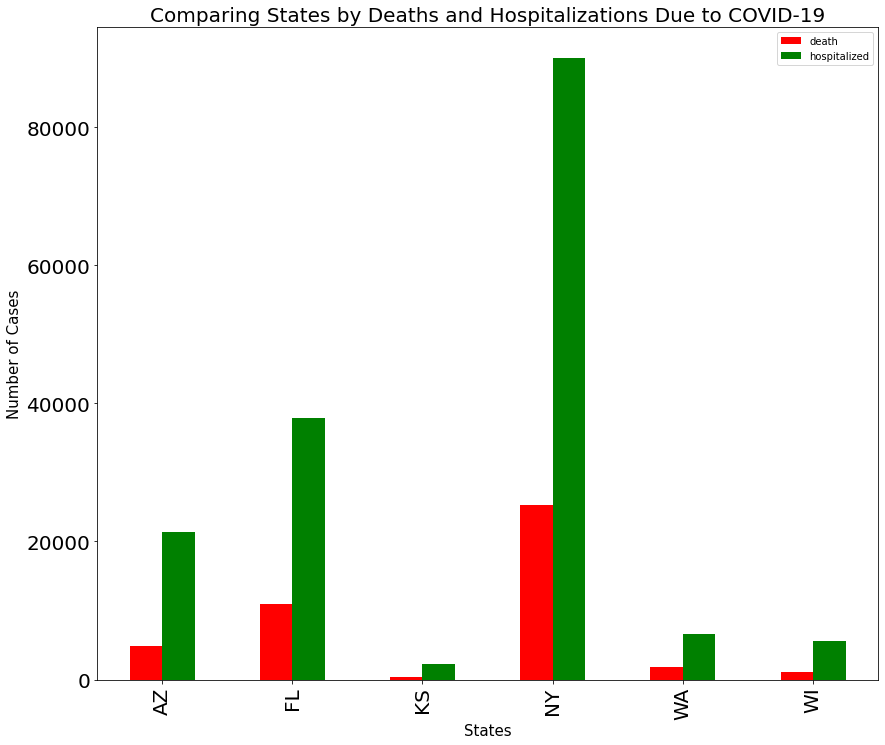

In [13]:
my_colors = "rgbkymc"
plot_pandas = special_states_data.plot.bar(figsize=(14,12),color= my_colors ,fontsize=20)
plt.xlabel("States", fontsize = 15)
plt.ylabel("Number of Cases", fontsize = 15)
plt.title("Comparing States by Deaths and Hospitalizations Due to COVID-19", fontsize=20)

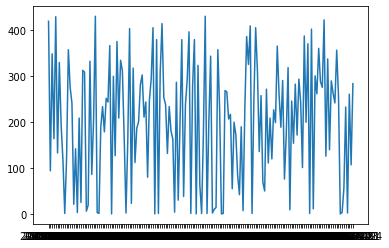

In [14]:
plt.plot(ks_data["date"],ks_data["deaths"])

Delete this!

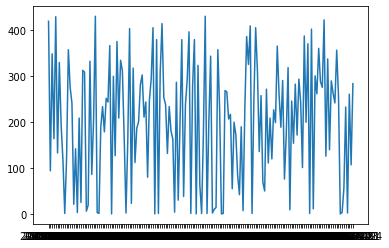

In [15]:
plt.plot(ks_data["date"],ks_data["deaths"])